# Model Evaluation

As of now, all of them have the same structure:
```
model: [
    Linear(128, 80),
    Activation('relu'),
    Linear(80, 40),
    Activation('relu'),
    Linear('40', '10'),
    Activation('tanh'),
]
```

## Learning Rate Evaluation

Hyperparameters:
- epochs: 50
- criterion: Softmax and CCE Loss
- optimizer: Adam
- learning rate: [0.1,0.05,0.01,0.005,0.001,0.0001]
- batch sizes: 1

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
models = []
losses = {}
train_accuracies = {}
test_accuracies = {}
time_takens = {}

folder = "../log/lr-3/"
for file in os.listdir(folder):

    # get the data
    f = open(os.path.join(folder, file), "r")
    all_data = f.readlines()
    f.close()

    # get the time taken
    time_taken = all_data[-2:-1]
    time_taken = float(time_taken[0].strip("\n").split(":")[1].strip("seconds"))

    # split the data into different data
    data = all_data[4:-2]
    loss = np.zeros(len(data))
    train_accuracy = np.zeros(len(data))
    test_accuracy = np.zeros(len(data))
    for i, line in enumerate(data):
        line = line.strip("\n")
        loss[i] = float(line.split(",")[0].split("=")[1])
        train_accuracy[i] = float(line.split(",")[1].split("=")[1].strip("%"))
        test_accuracy[i] = float(line.split(",")[1].split("=")[1].strip("%"))

    # add the data
    file = file.replace('.txt', '').replace('3_log_adam_lr=', '')
    models.append(file)
    losses[file] = loss
    train_accuracies[file] = train_accuracy
    test_accuracies[file] = test_accuracy
    time_takens[file] = time_taken

# sort the models
models.sort(key=lambda x: float(x))
for model in models:
    print(model)

0.0001
0.001
0.005
0.01
0.05
0.1


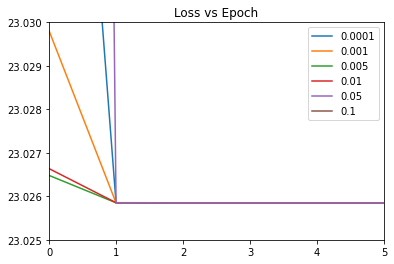

In [3]:
# plt.figure(figsize=(20, 8))
plt.title("Loss vs Epoch")
for model in models:
    plt.plot(losses[model], label=model)

plt.ylim((23.025, 23.030))
plt.xlim((0, 5))
plt.legend()
plt.show()

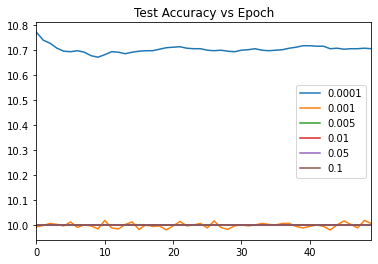

In [4]:
# plt.figure(figsize=(16, 12))
plt.title("Test Accuracy vs Epoch")
for model in models:
    plt.plot(test_accuracies[model], label=model)
plt.xlim((0, 49))
plt.legend()
plt.show()

0.0001: 10.706%
0.001: 10.006%
0.005: 10.0%
0.01: 10.0%
0.05: 10.0%
0.1: 10.0%


[]

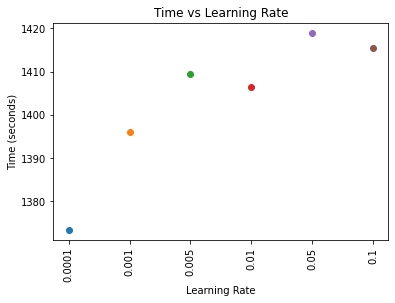

In [5]:
plt.title('Time vs Learning Rate')
for model in models:
    plt.scatter(y=time_takens[model], x=model.replace('2_log_adam_lr=', ''))
    print(f"{model}: {test_accuracies[model][-1]}%")

plt.ylabel("Time (seconds)")
plt.xlabel("Learning Rate")
plt.xticks(rotation=90)
plt.plot()